In [3]:
import tensorflow as tf

In [4]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
!nvidia-smi

Tue Aug 10 10:33:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### creating values to fit

In [6]:
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0,17.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0])

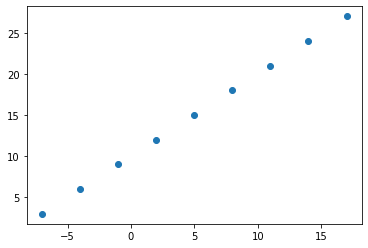

In [9]:
plt.scatter(X,y)

In [10]:
import tensorflow_probability as tfp

In [11]:
slope = tfp.stats.covariance(tf.constant(X),tf.constant(y),event_axis=None)/ tf.math.reduce_variance(tf.constant(X))
slope.numpy()

1.0

In [12]:
interc = tf.math.reduce_mean(tf.constant(y)) - tf.math.reduce_mean(tf.constant(X))
interc.numpy()

10.0

### Creating our firs regression model

In [13]:
# convert input data into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17.], dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.], dtype=float32)>)

In [14]:
#there are 2 ways to run tf.keras.sequential apis:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#### or we can use:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [15]:
#we then compile our model with the loss function and the metrics we will use
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mean_absolute_error,
              metrics = ['mae'])

In [16]:
#let's fit our model
model.fit(X,y,epochs=25)

Epoch 1/25
1/1 [==============================] - 3s 3s/step - loss: 12.1497 - mae: 12.1497
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 11.8897 - mae: 11.8897
Epoch 3/25
1/1 [==============================] - 0s 5ms/step - loss: 11.6297 - mae: 11.6297
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 11.3697 - mae: 11.3697
Epoch 5/25
1/1 [==============================] - 0s 8ms/step - loss: 11.1097 - mae: 11.1097
Epoch 6/25
1/1 [==============================] - 0s 5ms/step - loss: 10.8497 - mae: 10.8497
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 10.5897 - mae: 10.5897
Epoch 8/25
1/1 [==============================] - 0s 8ms/step - loss: 10.3297 - mae: 10.3297
Epoch 9/25
1/1 [==============================] - 0s 5ms/step - loss: 10.0697 - mae: 10.0697
Epoch 10/25
1/1 [==============================] - 0s 5ms/step - loss: 9.8097 - mae: 9.8097
Epoch 11/25
1/1 [==============================] - 0s 7ms/step - loss: 9

In [17]:
#let's predict
model.predict([17])

array([[28.613228]], dtype=float32)

In [18]:
model.predict([20])

array([[33.62007]], dtype=float32)

Tweaking some hyperparameters!!!!

In [19]:
tf.random.set_seed(42)
#create the model
modely = tf.keras.Sequential([
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1)
])
#compile our model
modely.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])
#fit the model
modely.fit(X,y,epochs=155)

Epoch 1/155
1/1 [==============================] - 1s 501ms/step - loss: 14.7761 - mae: 14.7761
Epoch 2/155
1/1 [==============================] - 0s 5ms/step - loss: 11.3294 - mae: 11.3294
Epoch 3/155
1/1 [==============================] - 0s 5ms/step - loss: 7.7275 - mae: 7.7275
Epoch 4/155
1/1 [==============================] - 0s 6ms/step - loss: 4.0227 - mae: 4.0227
Epoch 5/155
1/1 [==============================] - 0s 6ms/step - loss: 7.2011 - mae: 7.2011
Epoch 6/155
1/1 [==============================] - 0s 6ms/step - loss: 6.9621 - mae: 6.9621
Epoch 7/155
1/1 [==============================] - 0s 7ms/step - loss: 4.8409 - mae: 4.8409
Epoch 8/155
1/1 [==============================] - 0s 9ms/step - loss: 3.8211 - mae: 3.8211
Epoch 9/155
1/1 [==============================] - 0s 10ms/step - loss: 5.0031 - mae: 5.0031
Epoch 10/155
1/1 [==============================] - 0s 7ms/step - loss: 5.1231 - mae: 5.1231
Epoch 11/155
1/1 [==============================] - 0s 8ms/step - loss: 

In [20]:
modely.predict([32])

array([[41.323887]], dtype=float32)

#### Evaluating a model

In [21]:
#first let's create a larger dataset
X = tf.range(-100,100,4)
y = X + 10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [22]:
X = tf.cast(X,dtype=tf.float32)
y = tf.cast(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

In [23]:
len(X)*0.8

40.0

In [24]:
#let's split our data into train and test datasets
X_train = X[:tf.cast(len(X)*0.8,dtype=tf.int32)]
X_test=X[len(X_train):]
y_train=y[:tf.cast(len(y)*0.8,dtype=tf.int32)]
y_test=y[len(y_train):]

In [25]:
X_train,X_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>)

In [26]:
len(X_train),len(X_test),len(y_test),len(y_train)

(40, 10, 10, 40)

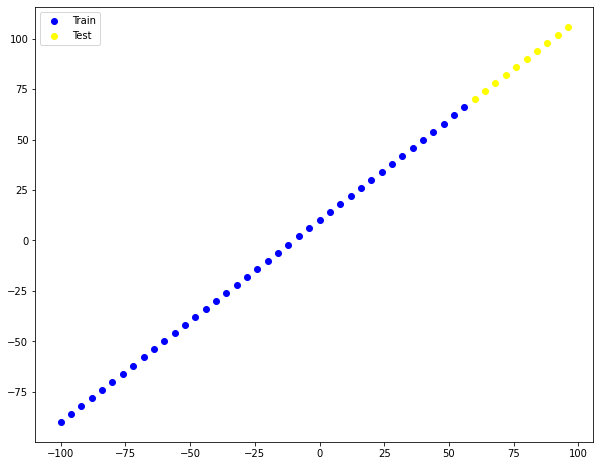

In [27]:
#let's visualize the data
plt.figure(figsize=[10,8])
#let's plot the training data
plt.scatter(X_train,y_train,color = 'blue',label="Train")
#let's plot the test data
plt.scatter(X_test,y_test,color = 'yellow',label='Test')
plt.legend()
plt.show()

In [28]:
modely.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [29]:
tf.random.set_seed(42)
#let's create a model a fit to our training dataset
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             
                            
                             tf.keras.layers.Dense(1)
])
#let's compile our model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#let's fit our model with 100 epochs(how many times our model goes thru the data)
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
2/2 [==============================] - 0s 8ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 19.0261 - mae: 19.0261
Epoch 3/150
2/2 [==============================] - 0s 7ms/step - loss: 13.5868 - mae: 13.5868
Epoch 4/150
2/2 [==============================] - 0s 6ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 8.6328 - mae: 8.6328
Epoch 6/150
2/2 [==============================] - 0s 5ms/step - loss: 10.8267 - mae: 10.8267
Epoch 7/150
2/2 [==============================] - 0s 5ms/step - loss: 11.7707 - mae: 11.7707
Epoch 8/150
2/2 [==============================] - 0s 4ms/step - loss: 11.8002 - mae: 11.8002
Epoch 9/150
2/2 [==============================] - 0s 5ms/step - loss: 11.1963 - mae: 11.1963
Epoch 10/150
2/2 [==============================] - 0s 5ms/step - loss: 10.0508 - mae: 10.0508
Epoch 11/150
2/2 [==============================] - 0s 7ms/step

In [30]:
model.predict(X_test[:1])

array([[69.88524]], dtype=float32)

In [31]:
model.evaluate(y_test[:1],model.predict(X_test[:1]))


1/1 [==============================] - 0s 147ms/step - loss: 9.9899 - mae: 9.9899


[9.989921569824219, 9.989921569824219]

In [32]:
y_test[:1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([70.], dtype=float32)>

In [33]:
tf.keras.losses.mean_absolute_error([70.],[66.05638])

<tf.Tensor: shape=(), dtype=float32, numpy=3.9436188>

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.utils import plot_model

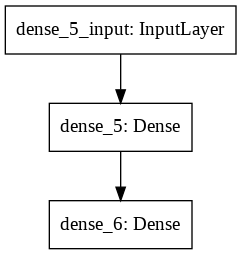

In [36]:
plot_model(model)

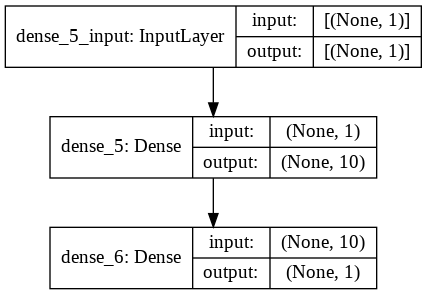

In [37]:
plot_model(model,show_shapes=True)

### let's predict our model

In [38]:
y_pre = model.predict(X_test)
y_pre

array([[ 69.88524 ],
       [ 73.8812  ],
       [ 77.877174],
       [ 81.87314 ],
       [ 85.86911 ],
       [ 89.86508 ],
       [ 93.86105 ],
       [ 97.85702 ],
       [101.85298 ],
       [105.84895 ]], dtype=float32)

In [39]:
y_test.numpy()

array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)

In [40]:
np.linspace(0,len(y_test))

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [41]:
#create a funct to visualize the disparity btwn our preds and test values
def ploty(X_train,X_test,y_train,y_true,y_pred):
  plt.figure(figsize=[8,6])
  plt.scatter(X_train,y_train,c= 'orange', label = "train values")
  #create a line plotfor the true values
  plt.scatter(X_test,y_test,c= 'blue', label = "test values")
  #create a line plot for predicted values
  plt.scatter(X_test,y_pred,c='magenta', label = "predicted values")
  plt.legend()
  plt.show();

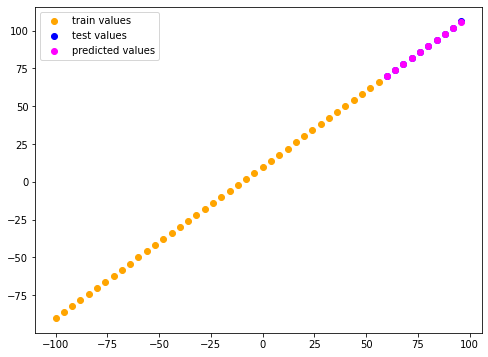

In [42]:
ploty(X_train,X_test,y_train,y_test,y_pre)

### Evaluating our model with evaluation metrics

In [43]:
tf.constant(y_pre),y_test,tf.reshape(tf.constant(y_pre),(10,))

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 69.88524 ],
        [ 73.8812  ],
        [ 77.877174],
        [ 81.87314 ],
        [ 85.86911 ],
        [ 89.86508 ],
        [ 93.86105 ],
        [ 97.85702 ],
        [101.85298 ],
        [105.84895 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.88524 ,  73.8812  ,  77.877174,  81.87314 ,  85.86911 ,
         89.86508 ,  93.86105 ,  97.85702 , 101.85298 , 105.84895 ],
       dtype=float32)>)

In [44]:
#using mae
tf.keras.losses.mae(y_test,tf.reshape(tf.constant(y_pre),(10,)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13290481>

In [45]:
maey = tf.keras.losses.MeanAbsoluteError()
maey(y_test,tf.constant(y_pre))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13290481>

In [46]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 102ms/step - loss: 0.1329 - mae: 0.1329


[0.1329048126935959, 0.1329048126935959]

In [47]:
y_pred = tf.squeeze(y_pre)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.88524 ,  73.8812  ,  77.877174,  81.87314 ,  85.86911 ,
        89.86508 ,  93.86105 ,  97.85702 , 101.85298 , 105.84895 ],
      dtype=float32)>

In [48]:
#mse
tf.metrics.mse(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.017797772>

In [49]:
def mae(y_true=y_test,y_pred=y_pre):
  return tf.keras.losses.mae(y_test,tf.squeeze(y_pred))
def mse(y_true=y_test,y_pred=y_pre):
  return tf.keras.losses.mse(y_true,tf.squeeze(y_pred))


In [50]:
model.get_weights()

[array([[ 0.29051408, -0.07806831, -0.13072821, -0.10556883, -0.5848673 ,
          0.33197257,  0.41538417,  0.6025726 , -0.4466796 , -0.15487285]],
       dtype=float32),
 array([ 1.6134678, -1.9148678,  1.6536378, -1.6809827,  1.6211485,
         1.5861981,  1.5777348,  1.5769321, -1.5968705, -2.1621118],
       dtype=float32),
 array([[ 0.44443163],
        [-0.33748525],
        [ 0.7586585 ],
        [-0.6823551 ],
        [ 0.3156632 ],
        [ 0.73757684],
        [ 0.8010931 ],
        [ 0.48802543],
        [-0.3572505 ],
        [-0.15516914]], dtype=float32),
 array([1.5596582], dtype=float32)]

###Running experiments to improve our model


**model_1**

In [51]:
tf.random.set_seed(42)
#create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
#compile our model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fitting the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3496 - mae: 9.3496
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 28.7872 - mae: 28.7872
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 31.2137 - mae: 31.2137
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 17.3518 - mae: 17.3518
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 20.5543 - mae: 20.5543
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 21.3185 - mae: 21.3185
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 16.0179 - mae: 16.0179
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 15.3227 - mae: 15.3227
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0070 - mae: 28.0070
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 14.4230 - mae: 14.4230
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [52]:
y_pred_1 = model.predict(X_test)

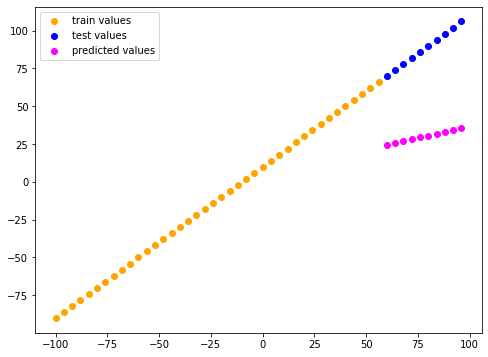

In [53]:
ploty(X_train,X_test,y_train,y_test,y_pred_1)

In [54]:
mae_1 = mae(y_pred=y_pred_1)

In [55]:
mse_1 = mse(y_pred=y_pred_1)

**model_2**

In [56]:
tf.random.set_seed(42)
#create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])
#create compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
#fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 36.0963 - mae: 36.0963
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 28.7401 - mae: 28.7401
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 33.2070 - mae: 33.2070
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 30.5341 - mae: 30.5341
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5505 - mae: 15.5505
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3355 - mae: 12.3355
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6147 - mae: 11.6147
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2547 - mae: 11.2547
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.3778 - mae: 42.3778
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 29.5266 - mae: 29.5266
Epoch 11/100
2/2 [==============================] - 0s 8ms

In [57]:
y_pred_2 = model_2.predict(X_test)

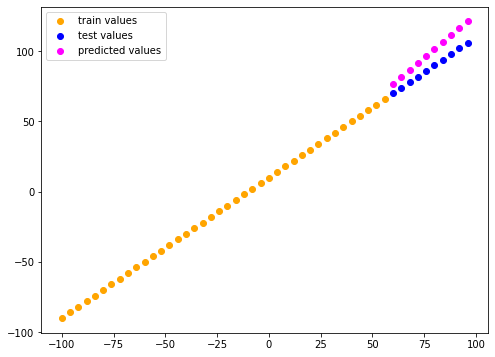

In [58]:
ploty(X_train,X_test,y_train,y_test,y_pred_2)

In [59]:
mae_2 = mae(y_pred=y_pred_2)

In [60]:
mse_2 = mse(y_pred=y_pred_2)

**model_3**

In [61]:
tf.random.set_seed(42)
#create model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
#compile
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])
#fit
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 25.2218 - mae: 25.2218
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6513 - mae: 24.6513
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 24.0944 - mae: 24.0944
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 23.5271 - mae: 23.5271
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 22.9716 - mae: 22.9716
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 22.4128 - mae: 22.4128
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 21.8393 - mae: 21.8393
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 21.2489 - mae: 21.2489
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 20.6952 - mae: 20.6952
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 20.1396 - mae: 20.1396
Epoch 11/500
2/2 [==============================] - 0s 7ms/

In [62]:
y_pred_3 = model_3.predict(X_test)

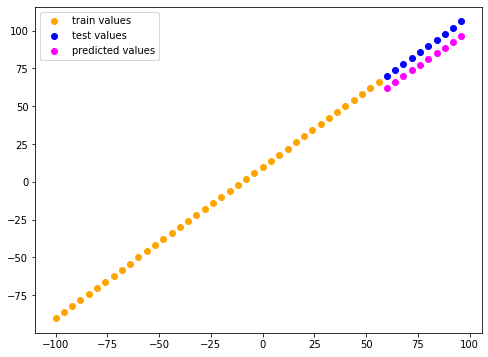

In [63]:
ploty(X_train,X_test,y_train,y_test,y_pred_3)

In [64]:
mae_3 = mae(y_pred=y_pred_3)
mse_3 = mse(y_pred=y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.695113>,
 <tf.Tensor: shape=(), dtype=float32, numpy=76.03499>)

###Comparing the results of our models

In [65]:
#putting our models in a dataframe
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_res = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_res

,model,mae,mse
0,model_1,58.030846,3428.979004
1,model_2,10.823942,125.051865
2,model_3,8.695113,76.034988


from the table **`model_3`** performed better

###Saving our models

In [66]:
#let us save our best model
#firstly, we save it in savedmodel format
model_3.save("my_best_model_savedmodel_format")

INFO:tensorflow:Assets written to: my_best_model_savedmodel_format/assets


In [67]:
#lastly,we save our model in hierarchical data format hdf5
model_3.save("my_model.h5")

###loading in the saved model

In [68]:
#first we load the savedmodel format model
new_model = tf.keras.models.load_model("/content/my_best_model_savedmodel_format")
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
y_pred_new = new_model.predict(X_test)

In [70]:
y_pred_3 == y_pred_new

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

watch 22!!

### Download a model

In [71]:
#download the model from colab using code
#import google colab
from google.colab import files

In [72]:
#download the model in h5 format
files.download("/content/my_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
#download the model in savedmodel format
files.download("/content/my_best_model_savedmodel_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
#download from colab to drive
#check below

In [75]:
!cp /content/my_model.h5  /content/drive/MyDrive

In [76]:
!ls

drive  model.png  my_best_model_savedmodel_format  my_model.h5	sample_data


In [77]:
!ls /content/drive/MyDrive

'02-kendrick_lamar-for_free_(interlude).mp3'
 03-kendrick_lamar-king_kunta.mp3
'03 Till I Die (feat. Big Sean & Wiz.mp3'
"05 Don't Judge Me.mp3"
'05-kendrick_lamar-these_walls_(feat._bilal_anna_wise_and_thundercat).mp3'
'08-kendrick_lamar-for_sale_(interlude).mp3'
'08 Sweet Love.mp3'
 1008.1510.pdf
 1202.0447.pdf
'18 Glow (feat. Kanye West).mp3'
 195.pdf
 20190525_182234.jpg
 20190525_182240.jpg
 20190525_204424.jpg
 20190525_204749.jpg
 20190525_204758.jpg
 20190528_091449.jpg
 20190528_102207.jpg
 20190528_102346.jpg
 20190528_102351.jpg
 20190528_102519.jpg
 20190528_102529.jpg
 20190528_102707.jpg
 20190530_145055.jpg
 20190530_145102.jpg
 20190530_145109.jpg
 20190530_145123.jpg
 20190530_145135.jpg
 20190530_145137.jpg
 20190530_150902.jpg
 20190530_150904.jpg
 20190530_150909.jpg
 20190530_150912.jpg
 20190530_150914.jpg
 20190530_150916.jpg
 20190530_150923.jpg
 20190608_101544.jpg
 20190608_101545.jpg
 20190608_101548.jpg
'20190608_101550(0).jpg'
 20190608_101550.jpg
 20190608

### a larger example

In [79]:
#import the data 
insurance = pd.read_csv("/content/drive/MyDrive/medata/insurance.csv",low_memory=False)
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
insurance.shape

In [ ]:
insurance.info()

In [ ]:
insurance.isna().sum()

In [ ]:
pd.api.types.is_categorical(insurance["region"])

In [ ]:
np.unique(pd.Categorical(insurance["region"]).codes,return_counts=True)

In [ ]:
insurance["region"].value_counts()

In [83]:
def preprocessing(df):
    #convert categorical to numeric and fill missing values with median
    for key,value in df.items():
        if not pd.api.types.is_numeric_dtype(value):
            df[key] = pd.Categorical(value).codes 
    return df 

In [84]:
df2 = preprocessing(insurance)
df2.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [ ]:
pd.Categorical(insurance["sex"]).codes

In [ ]:
df2["region"].value_counts()

In [80]:
#turn our data to numerical using get_dummy method from pandas
insurance_one = pd.get_dummies(insurance)
insurance_one.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
feat = insurance_one.drop("charges",axis=1)
target = insurance_one["charges"]

In [ ]:
feat.head()

In [ ]:
target[:15]

In [ ]:
X = feat.to_numpy()
X

In [ ]:
X = tf.constant(X,dtype=tf.float32)
X

In [ ]:
y = tf.constant(target,dtype=tf.float32)
y

In [ ]:
X[:round(len(X)*0.8)]

In [ ]:
#split data
X_train = X[:round(len(X)*0.8)]
X_test = X[len(X_train):]
y_train = y[:round(len(y)*0.8)]
y_test = y[len(y_train):]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
len(X) == (len(X_test)+len(X_train))

In [ ]:
tf.random.set_seed(42)
#create our first model
model_ins = tf.keras.Sequential([
                                 tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)
])
#compile our model
model_ins.compile(loss= tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=["mae"])
#fit our model
model_ins.fit(X_train,y_train,epochs=100)

In [85]:
from sklearn.model_selection import train_test_split

In [ ]:
XX_train,XX_test,yy_train,yy_test = train_test_split(X.numpy(),y.numpy(),test_size=0.2,random_state=42) 

In [ ]:
XX_train.shape,XX_test.shape,yy_train.shape,yy_test.shape

In [ ]:
XX_train = tf.constant(XX_train,dtype=tf.float32)
XX_test = tf.constant(XX_test,dtype=tf.float32)
yy_train = tf.constant(yy_train,dtype=tf.float32)
yy_test = tf.constant(yy_test,dtype=tf.float32)

In [ ]:
XX_test

In [ ]:
tf.random.set_seed(42)
#create our first model
model_ins_1 = tf.keras.Sequential([
                                 tf.keras.layers.Dense(100),
                                #  tf.keras.layers.Dense(100),
                                 tf.keras.layers.Dense(1)
])
#compile our model
model_ins_1.compile(loss= tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=["mae"])
#fit our model
model_ins_1.fit(XX_train,yy_train,epochs=100)

In [ ]:
model_ins_1.evaluate(XX_test,yy_test)

### Improve our model

In [ ]:
tf.random.set_seed(42)
#create the model
model_ins_2 = tf.keras.Sequential([
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(1),
])
#compile the model
model_ins_2.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae"])
#fit the model
history = model_ins_2.fit(XX_train,yy_train,epochs=150)

In [ ]:
model_ins_2.evaluate(XX_test,yy_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("mae")
plt.xlabel("epochs")

###Preprocessing data (Normalization and standardization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
insurance_one

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [86]:
feat = insurance_one.drop("charges",axis=1)
target = insurance_one["charges"]
X_train,X_test,y_train,y_test = train_test_split(feat,target,test_size=0.2,random_state=42) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [88]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [90]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [91]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [92]:
tf.random.set_seed(42)
#create the model
mod_scaled = tf.keras.Sequential([
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(1),
])
#compile the model
mod_scaled.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae"])
#fit the model
history = mod_scaled.fit(X_train,y_train,epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13327.1826 - mae: 13327.1826
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 13197.6719 - mae: 13197.6719
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 12529.7002 - mae: 12529.7002
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 10223.0732 - mae: 10223.0732
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 7643.3804 - mae: 7643.3804
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 7408.9355 - mae: 7408.9355
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 7355.2192 - mae: 7355.2192
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 7315.1528 - mae: 7315.1528
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 7274.5786 - mae: 7274.5786
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 7234.4971 - mae: 7

In [93]:
mod_scaled.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2302.6401 - mae: 2302.6401


[2302.64013671875, 2302.64013671875]

In [101]:
tf.random.set_seed(42)
#let's create a callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=15)
#create the model
mod_scaled_1 = tf.keras.Sequential([
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(50,activation="relu"),
                                   tf.keras.layers.Dense(1),
])
#compile the model
mod_scaled_1.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae"])
#fit the model
history1 = mod_scaled_1.fit(X_train_scaled,y_train,epochs=150,callbacks=[callback])

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13344.1621 - mae: 13344.1621
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 13304.2197 - mae: 13304.2197
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 12813.5850 - mae: 12813.5850
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 10157.4785 - mae: 10157.4785
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 8065.5503 - mae: 8065.5503
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 7818.6914 - mae: 7818.6914
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 7508.6719 - mae: 7508.6719
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 7193.1108 - mae: 7193.1108
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 6811.9629 - mae: 6811.9629
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 6303.2349 - mae: 6

In [102]:
mod_scaled_1.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1766.2520 - mae: 1766.2520


[1766.251953125, 1766.251953125]

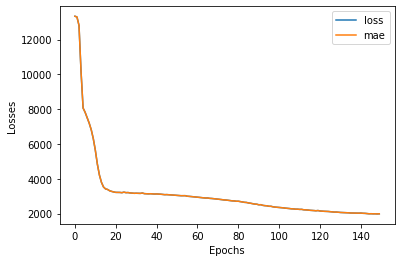

In [110]:
pd.DataFrame(history1.history).plot()
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.legend();

###modelling using shallow ML Algorithm

In [98]:
#let's import random forest
from sklearn.ensemble import RandomForestRegressor

In [109]:
modelly = RandomForestRegressor()
modelly.fit(X_train_scaled,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:

modelly.score(X_train_scaled,y_train),modelly.score(X_test_scaled,y_test)

(0.9762778882620262, 0.8605548868633788)

In [105]:
from sklearn.metrics import mean_absolute_error as mae

In [107]:
y_predo = modelly.predict(X_test_scaled)

In [108]:
#evaluating our shallow model
mae(y_test,y_predo)

2530.386291918485